In [1]:
#!pip3 list

## Design of Experiments

This research adopted the Sliding Window Cross Validation approach for evaluating the performance of a set of forecasting methods $\mathcal{M}$ over a set of datasets $\mathcal{D}$. 

Each dataset $\mathcal{d}_j \in \mathcal{D}$ was splited in $k = 31$ overlapped data windows with $W = 2000$ samples, each one of them shifted by $I = 200$ instances from left to the right.

For each data window $\mathcal{d}_{w,j} \in \mathcal{d}_j$, where $w=1\ldots k$ and $j=1\ldots |\mathcal{D}|$, a forecasting model $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ is trained and tested, for each forecasting method $\mathcal{m}_i \in \mathcal{M}$. The train and test subsets of $\mathcal{d}_{w,j}$ have a 80%/20% proportion.

The performance $\epsilon[m_i, d_j, w]$ of each $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ model is evaluated using the RMSE metric using the test subset of $\mathcal{d}_{w,j}$.

## Statistical Testing

Given the mean $\mu_{m_i, d_j} = \frac{\sum_{w=1}^W \epsilon[m_i, d_j, w]}{W}$,  ANOVA aims to test the hypothesis:

* $H_0$: The $\mu_{m_i, d_j}$ means are equal 
* $H_1$: At least one $\mu_{m_i, d_j}$ mean are not equal

For the parametric ANOVA test, the F-test, some conditions must be respected:

a) The samples must be independent and equaly distributed (i.i.d)

b) The samples must be normally distributed;

c) The samples must be homoskedastic (the variances must be equal)

For the nonparametric tests there are no conditions.

When the $H_0$ is rejected it means that the samples can be not equal, and therefore we need to compare all samples against themselves. This is called *post-hoc* tests.

* $H_0$: $\mu_{m_a, d_j} < \mu_{m_b, d_j}$
* $H_1$: $\mu_{m_a, d_j}\geq \mu_{m_b, d_j}$

In [6]:
#!jupyter kernelspec list

In [7]:
#!pip3 list

In [8]:
import sys
print(sys.executable) 

/opt/homebrew/Cellar/jupyterlab/3.4.8_1/libexec/bin/python3.11


In [10]:
#! /opt/homebrew/Cellar/jupyterlab/3.4.8_1/libexec/bin/python3.11 -m pip install matplotlib

In [19]:
#! /opt/homebrew/Cellar/jupyterlab/3.4.8_1/libexec/bin/python3.11 -m pip install scipy

In [18]:
from scipy import stats
import itertools

## Experiment Data

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('data_ht_miso.csv', sep=',')
#df.head()
pd.set_option('display.max_rows', None)
df

,ds,model,window,rmse
0,AEC,PWMVFTS,0,0.550000
1,AEC,PWMVFTS,1,1.731000
2,AEC,PWMVFTS,2,0.030000
3,AEC,PWMVFTS,3,0.000000
4,AEC,PWMVFTS,4,0.390000
5,AEC,PWMVFTS,5,0.000000
6,AEC,PWMVFTS,6,0.103000
7,AEC,PWMVFTS,7,0.065000
8,AEC,PWMVFTS,8,0.272000
9,AEC,PWMVFTS,9,0.634000


In [62]:
datasets = df['ds'].unique()
datasets

array(['AEC', 'KSH1', 'HPC1', 'HPC30', 'KSH10'], dtype=object)

In [63]:
methods = df['model'].unique()
# methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SLSTM2', 'SVR']
#methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SVR']
methods = ['PWMVFTS', 'AWMVFTS', 'PSARIMAX', 'SARIMAX', 'NAIVE', 'LSTM', 'GRU','RNN','TCN']
datasets = ['AEC', 'KSH1','KSH10','HPC1','HPC30']
list(methods)

['PWMVFTS',
 'AWMVFTS',
 'PSARIMAX',
 'SARIMAX',
 'NAIVE',
 'LSTM',
 'GRU',
 'RNN',
 'TCN']

## Experiment Histograms

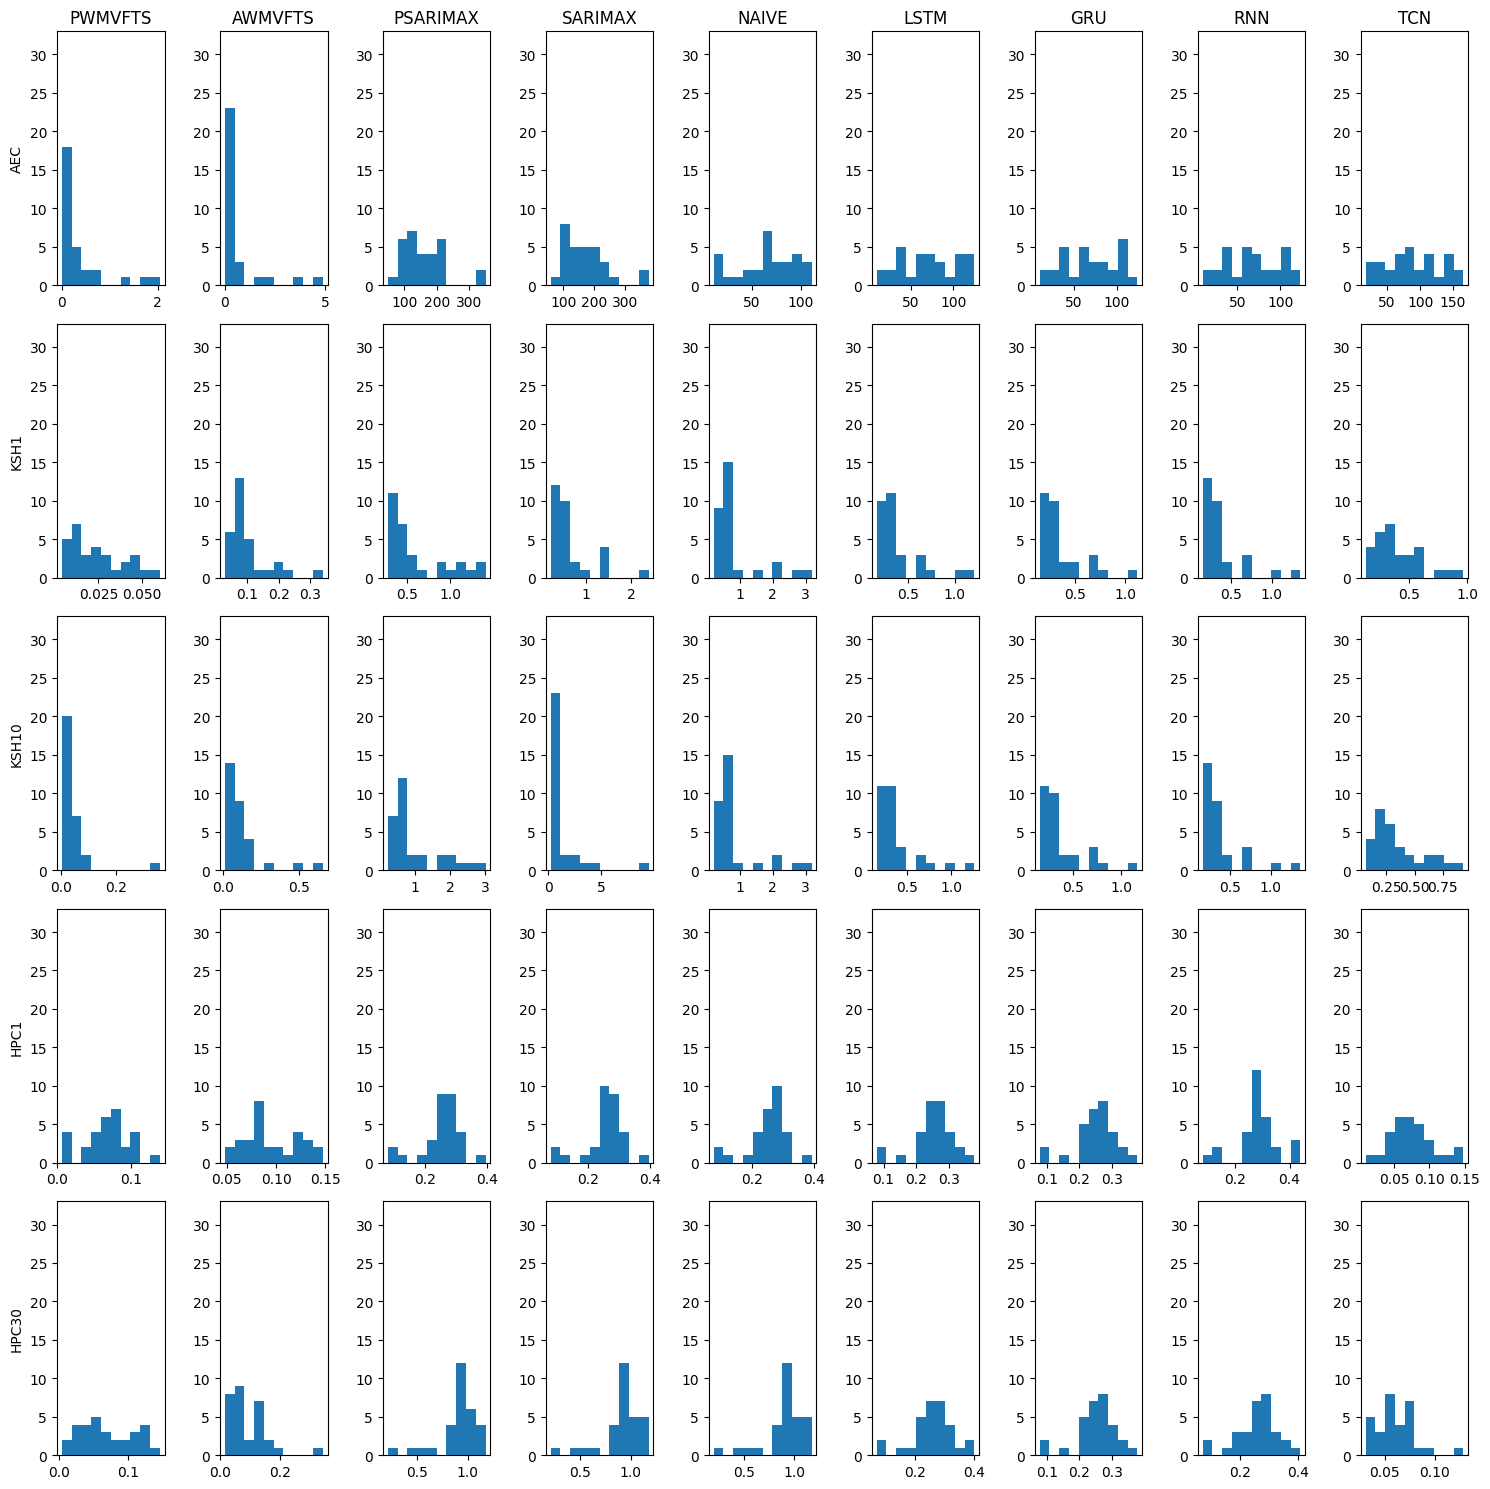

In [64]:
datasets2 = list(datasets)#['AEC', 'KSH', 'AQI', 'AQB1', 'AQB6', 'AQB12']

#datasets2 = ['AQI', 'AQB1', 'AQB6', 'AQB12']

methods2 = list(methods) #['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

num_rows = len(datasets2)
num_cols = len(methods2)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for count1, dataset in enumerate(datasets2):

  for count2, method in enumerate(methods2):
    tmp = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']

    ax[count1][count2].hist(tmp)

    ax[count1][count2].set_ylim([0, 33])

    if count2 == 0:
      ax[count1][count2].set_ylabel(dataset)
    
    if count1 == 0:
      ax[count1][count2].set_title(method)

plt.tight_layout()


## Hypothesis Test

- Anova Test - Kruskal Wallis
- Post Hoc: Wilcoxon

$\alpha = .01$

In [65]:
from scipy import stats
import itertools

anova_result = {
    "dataset": [],
    "statistic": [],
    "pvalue": [],
    "result": []
}

posthoc_result = {
    "dataset": [],
    "methods": [],
    "statistic": [],
    "pvalue": [],
    "result": []
}

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']
print(list(methods))

alpha = 0.01

anova_test = stats.kruskal #stats.friedmanchisquare #stats.kruskal 
post_hoc_test = stats.wilcoxon

for dataset in datasets:
  #if dataset != 'SONDA':
    samples = []
    for method in competing_methods:
      sample = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']
      #print(sample)
      samples.append(sample)

    result = anova_test(*samples)

    if result.pvalue > alpha:
      test = 'Fail to Reject H0'
    else:
      test = 'H0 rejected'

    print('ANOVA {} result: {}, {}'.format(dataset, result, test))
    
    anova_result["dataset"].append(dataset)
    anova_result["statistic"].append(result.statistic)
    anova_result["pvalue"].append(result.pvalue)
    anova_result["result"].append(test)

    if result.pvalue < alpha:
      for a,b in itertools.product(competing_methods , competing_methods):
        if a != b:
          i = competing_methods.index(a)
          j = competing_methods.index(b)
          result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

          if result2.pvalue > alpha:
            test = 'Fail to Reject H0'
          else:
            test = 'H0 rejected'

          print('\t Wilcoxon {} x {} = {}, {}'.format(a,b,result2, test))
          
          posthoc_result["dataset"].append(dataset)
          posthoc_result["methods"].append(a + " x " + b)
          posthoc_result["statistic"].append(result2.statistic)
          posthoc_result["pvalue"].append(result2.pvalue)
          posthoc_result["result"].append(test)

    print("")

['PWMVFTS', 'AWMVFTS', 'PSARIMAX', 'SARIMAX', 'NAIVE', 'LSTM', 'GRU', 'RNN', 'TCN']
ANOVA AEC result: KruskalResult(statistic=196.02196046871046, pvalue=4.3995142316551614e-38), H0 rejected
	 Wilcoxon PWMVFTS x AWMVFTS = WilcoxonResult(statistic=255.0, pvalue=0.1181839661538443), Fail to Reject H0
	 Wilcoxon PWMVFTS x PSARIMAX = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x SARIMAX = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x NAIVE = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x LSTM = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x GRU = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x RNN = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon PWMVFTS x TCN = WilcoxonResult(statistic=0.0, pvalue=1.0), Fail to Reject H0
	 Wilcoxon AWMVFTS x PWMVFTS = WilcoxonResult(statistic=151.0, pvalue=0.8

/opt/homebrew/Cellar/jupyterlab/3.4.8_1/libexec/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [66]:
df_anova_result = pd.DataFrame(anova_result)
df_anova_result

,dataset,statistic,pvalue,result
0,AEC,196.021960,4.399514e-38,H0 rejected
1,KSH1,164.462743,1.863239e-31,H0 rejected
2,KSH10,172.077612,4.731317e-33,H0 rejected
3,HPC1,168.399604,2.791490e-32,H0 rejected
4,HPC30,225.393076,2.790663e-44,H0 rejected


In [67]:
df_anova_result.to_csv(r'final_anova_miso.csv', index = False, header=True)

In [68]:
print(len(posthoc_result['dataset']))
print(len(posthoc_result['methods']))

360
360


In [69]:
df_posthoc_result = pd.DataFrame(posthoc_result, columns=list(posthoc_result.keys()))
df_posthoc_result

,dataset,methods,statistic,pvalue,result
0,AEC,PWMVFTS x AWMVFTS,255.0,1.181840e-01,Fail to Reject H0
1,AEC,PWMVFTS x PSARIMAX,0.0,1.000000e+00,Fail to Reject H0
2,AEC,PWMVFTS x SARIMAX,0.0,1.000000e+00,Fail to Reject H0
3,AEC,PWMVFTS x NAIVE,0.0,1.000000e+00,Fail to Reject H0
4,AEC,PWMVFTS x LSTM,0.0,1.000000e+00,Fail to Reject H0
5,AEC,PWMVFTS x GRU,0.0,1.000000e+00,Fail to Reject H0
6,AEC,PWMVFTS x RNN,0.0,1.000000e+00,Fail to Reject H0
7,AEC,PWMVFTS x TCN,0.0,1.000000e+00,Fail to Reject H0
8,AEC,AWMVFTS x PWMVFTS,151.0,8.818160e-01,Fail to Reject H0
9,AEC,AWMVFTS x PSARIMAX,0.0,1.000000e+00,Fail to Reject H0


In [70]:
df_posthoc_result.to_csv(r'final_anova_posthoc.csv', index = False, header=True)

### Rankings

In [71]:
from scipy import stats
import itertools

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

anova_test = stats.kruskal #stats.friedmanchisquare #stats.kruskal #stats.friedmanchisquare
post_hoc_test = stats.wilcoxon

final_ranking = []

for dataset in datasets:
  #if dataset != 'SONDA':
    samples = []
    for method in competing_methods:
      sample = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']
      samples.append(sample)

    result = anova_test(*samples)

    if result.pvalue < alpha:
      
      post_hoc = {k: 0 for k in competing_methods}
      
      for a,b in itertools.product(competing_methods , competing_methods):
        if a != b:
          i = competing_methods.index(a)
          j = competing_methods.index(b)
          result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

          if result2.pvalue > alpha:
            post_hoc[a] += 1
      
      print(post_hoc)
      ranking = [len(methods) - v for v in post_hoc.values()]

      ranking.insert(0, dataset)

      final_ranking.append(ranking)


columns = competing_methods.copy()

columns.insert(0,'Dataset')

df_final_ranking = pd.DataFrame(final_ranking, columns=columns) 

#print("")
df_final_ranking

{'PWMVFTS': 8, 'AWMVFTS': 8, 'PSARIMAX': 1, 'SARIMAX': 1, 'NAIVE': 6, 'LSTM': 4, 'GRU': 6, 'RNN': 6, 'TCN': 2}
{'PWMVFTS': 8, 'AWMVFTS': 7, 'PSARIMAX': 2, 'SARIMAX': 2, 'NAIVE': 0, 'LSTM': 6, 'GRU': 6, 'RNN': 6, 'TCN': 6}
{'PWMVFTS': 8, 'AWMVFTS': 7, 'PSARIMAX': 1, 'SARIMAX': 1, 'NAIVE': 2, 'LSTM': 5, 'GRU': 6, 'RNN': 6, 'TCN': 6}
{'PWMVFTS': 8, 'AWMVFTS': 7, 'PSARIMAX': 4, 'SARIMAX': 1, 'NAIVE': 5, 'LSTM': 5, 'GRU': 5, 'RNN': 0, 'TCN': 8}
{'PWMVFTS': 8, 'AWMVFTS': 8, 'PSARIMAX': 1, 'SARIMAX': 1, 'NAIVE': 2, 'LSTM': 5, 'GRU': 5, 'RNN': 5, 'TCN': 8}


/opt/homebrew/Cellar/jupyterlab/3.4.8_1/libexec/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Dataset,PWMVFTS,AWMVFTS,PSARIMAX,SARIMAX,NAIVE,LSTM,GRU,RNN,TCN
0,AEC,1,1,8,8,3,5,3,3,7
1,KSH1,1,2,7,7,9,3,3,3,3
2,KSH10,1,2,8,8,7,4,3,3,3
3,HPC1,1,2,5,8,4,4,4,9,1
4,HPC30,1,1,8,8,7,4,4,4,1


In [72]:
#df_final_ranking.T
df_final_ranking = df_final_ranking.transpose()
df_final_ranking

,0,1,2,3,4
Dataset,AEC,KSH1,KSH10,HPC1,HPC30
PWMVFTS,1,1,1,1,1
AWMVFTS,1,2,2,2,1
PSARIMAX,8,7,8,5,8
SARIMAX,8,7,8,8,8
NAIVE,3,9,7,4,7
LSTM,5,3,4,4,4
GRU,3,3,3,4,4
RNN,3,3,3,9,4
TCN,7,3,3,1,1


In [74]:
df_final_ranking.to_csv(r'final_ranking_miso.csv', index = False, header=True)

In [ ]:
#post_hoc.values()